In [55]:
import matplotlib.pyplot as plt
import functools
import numpy as np
import pandas as pd
import math

# Sigmoid vs Exponential Modelling

The goal of this notebook is to study the differences in behaviour between sigmoids and exponentials prior to the sigmoids inflection point

A sigmoid is described by $ \frac{1}{1+e^{-x}}$, or if we want to take into account a center and scale factors it can be described as $ \frac{\beta}{1+e^{-\alpha(x-c)}}+h$, so that the sigmoid has an inflection point at $c$, the $x$ axis is scaled by $\alpha$ and the $y$ axis is scaled by $\beta$

An exponential is usually written as $e^x$, but can be described as $e^{\alpha(x-c)}+h$ where $\alpha$ is a scale factor and $c$ gives us a translation on the $x$ axis.

In [11]:
def sigmoid(a,b,c,h,x):
    return np.divide(b,1+math.exp(-a*(x-c))) + h

def exponential(a,c,h,x):
    return math.exp(a*(x-c)) + h

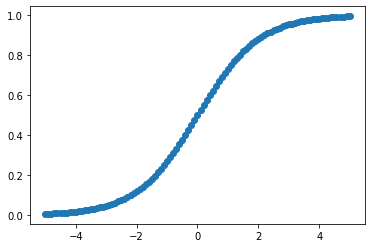

In [24]:
plt.scatter(x=np.linspace(-5,5,101),
            y=[sigmoid(a=1,b=1,c=0,h=0,x=x) for x in np.linspace(-5,5,101)])

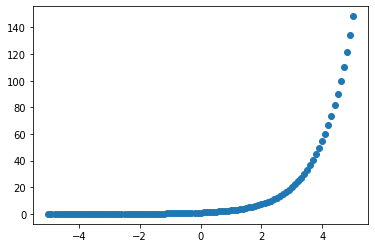

In [25]:
plt.scatter(x=np.linspace(-5,5,101),
            y=[exponential(a=1,c=0,h=0,x=x) for x in np.linspace(-5,5,101)])

Our methodology here will be to generate a few samples of either distribution, try to find the best fit to the data using both exponential and sigmoid functions, and compare how easy it is to distingush them.
A key test will be to see if we can correctly guess the original dsitribution even though there is noise involved.

In [60]:
class FittingClass:
    def __init__(self,distribution, lower_bound, upper_bound, sample_size, noise_function):
        """
        :param distribution: a one parameter distribution over time. This will usually be a sigmoid or an exponential.
        :param lower_bound: the moment at which we start gethering data on the given function
        :param upper_bound: the last moment at which we start gethering data
        :param sample_size: the number of data points we want to gather.
        :param noise_function: A function that given an integer n, returns the noise for n data points. Usually these are assumed to be independent, but this might not be the case.
        """
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.distribution = distribution
        self.noise_function = noise_function
        self.sample_size = sample_size
        self.sample = self.generate_sample()
        self.plot_sample()

    def generate_sample(self):
        x = np.linspace(self.lower_bound,
                        self.upper_bound,
                        self.sample_size)
        y = np.array([self.distribution(x=z) for z in x]) + np.array(self.noise_function(self.sample_size))
        return pd.DataFrame({"x": x, "y":y})

    def fit_sigmoid(self):
        pass

    def fit_exponential(self):
        pass

    def print_metrics(self):
        pass
    
    def plot_sample(self):
        plt.scatter(x=self.sample["x"],
                    y=self.sample["y"])

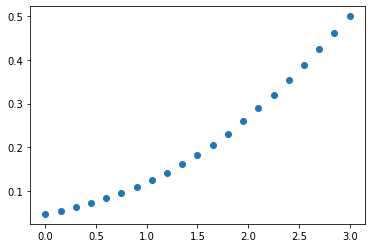

In [65]:
z = FittingClass(distribution=functools.partial(sigmoid, a=1,b=1,c=3,h=0),
                 lower_bound=0,
                 upper_bound=3,
                 sample_size=21,
                 noise_function=lambda n: [0]*n)